Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ventus/.local/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/fbd1a7bb7c0747dca2dcc92b90e4a3e0-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/fbd1a7bb7c0747dca2dcc92b90e4a3e0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 32 RHS
At line 38 BOUNDS
At line 43 ENDATA
Problem MODEL has 5 rows, 4 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2 - 0.00 seconds
Cgl0004I processed model has 2 rows, 3 columns (3 integer (3 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 2
Cbc0038I Before mini branch and bound, 3 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solut

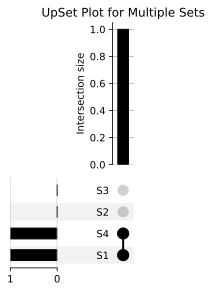

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMinimize, LpBinary, lpSum, LpStatus, value
from upsetplot import UpSet

# Define the sets and their corresponding elements
sets = {
    'S1': {1, 2, 3},
    'S2': {2, 4},
    'S3': {3, 5},
    'S4': {4, 5}
}

# Define elements
elements = {1, 2, 3, 4, 5}

# Create the ILP problem
problem = LpProblem("SetCover", LpMinimize)

# Create binary variables for each set
x = LpVariable.dicts("x", sets.keys(), cat=LpBinary)

# Objective function: Minimize the number of sets used
problem += lpSum([x[s] for s in sets.keys()])

# Constraints: Ensure all elements are covered
for e in elements:
    problem += lpSum([x[s] for s in sets if e in sets[s]]) >= 1, f"cover_{e}"

# Solve the problem
problem.solve()

# Get the selected sets
selected_sets = [s for s in sets.keys() if value(x[s]) == 1]

# Display the results
print("Selected sets to cover all elements:", selected_sets)

# Prepare data for UpSet plot
data = {s: [1 if s in selected_sets else 0 for e in elements] for s in sets.keys()}
data_df = pd.DataFrame(data, index=[f'Item {i+1}' for i in range(len(data['S1']))])

# # Visualize the results using UpSet plot
# upset = UpSet(data_df)
# upset.plot()
# plt.title("Set Cover Solution Visualization")
# plt.show()

# Convert the DataFrame to a multi-index series
set_counts = data_df.groupby(['S1', 'S2', 'S3', 'S4']).size()

# Create UpSet plot
upset = UpSet(set_counts, subset_size='count')
upset.plot()
plt.title("UpSet Plot for Multiple Sets")
plt.show()


In [2]:
df

NameError: name 'df' is not defined

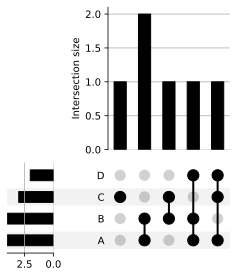

In [3]:
import pandas as pd
from upsetplot import UpSet, plot, from_indicators
import matplotlib.pyplot as plt

# Sample data
data = {
    'A': [1, 1, 0, 1, 0, 1],
    'B': [1, 0, 1, 1, 0, 1],
    'C': [0, 1, 1, 0, 1, 0],
    'D': [1, 1, 0, 0, 0, 0],
}

# Creating a DataFrame
df = pd.DataFrame(data, dtype=bool)
UpSet(from_indicators(df), subset_size='count')
